In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
def csv_load(path:str):
    """function that read csv files and 
        return the dataframe
    parameters:
    path: str, path of the csv file
    """
    df = pd.read_csv(path)
    return df 

#### Loading the Dataset


In [3]:
df = csv_load(f'housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.columns  # Number of the columns features.
print(f"The number of the features are: {len(df.columns)}")
df.columns

The number of the features are: 10


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
# Getting the idea of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# For describin about the data 
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#####  about the datatype they are float numbers, only the ocean_proximity have differnce. 
##### the column, total_bedrroms have the missing values.


In [7]:
df["ocean_proximity"].value_counts(sort=True, normalize=True)    #Getting the distinct values 
# Will return the precentage of occurence for each distinct values. 

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

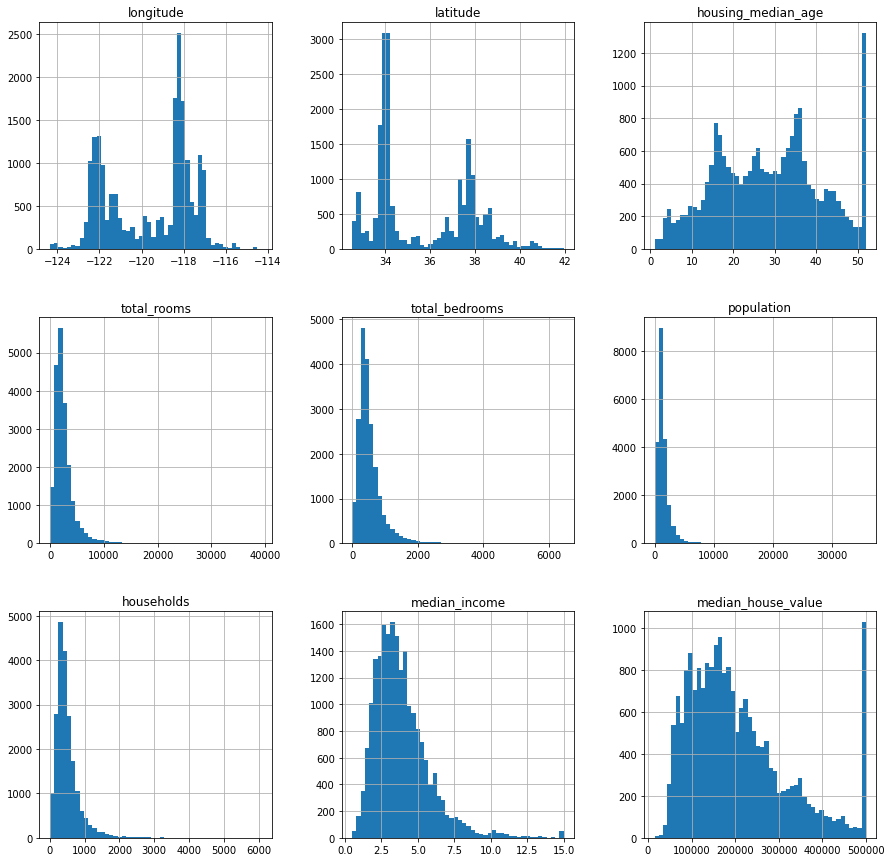

In [8]:
#Ploting the data : histogram. 
df.hist(bins=50, figsize=(15,15))
plt.show()

#### Creating a Test Dataset

In [9]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df,test_size=0.2, random_state= 42)

#### Stratification of Dataset Probelm.


In [10]:
# From the dataset it provided that income is mjor determining
# Factor. so we have to look into it.


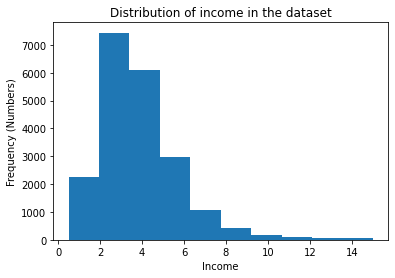

In [11]:
plt.hist(df["median_income"], histtype="bar")
plt.xlabel("Income")
plt.ylabel("Frequency (Numbers)")
plt.title("Distribution of income in the dataset")
plt.show()

In [12]:
df["income_cat"] = np.ceil(df["median_income"]/1.5)

In [13]:
df["income_cat"].where(df["income_cat"]<5, 5, inplace=True)

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [15]:
#Importing the required libraries for stratified classifications of the dataset. 
from sklearn.model_selection import StratifiedShuffleSplit



In [16]:
#Spltting the data
splitting_= StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                                   random_state=42)
for train_idex, test_index in  splitting_.split(df,df["income_cat"]):
    strat_train_set = df.loc[train_idex]
    strat_test = df.loc[train_idex]
    

In [17]:
for set in (strat_train_set,strat_test):
    set.drop(["income_cat"], axis=1, inplace=True)

In [18]:
#### Data exploration in the training dataset to avoid
# any problem while analysing the data. 
exp_data = strat_train_set.copy()

In [19]:
exp_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [20]:
import seaborn as sns 

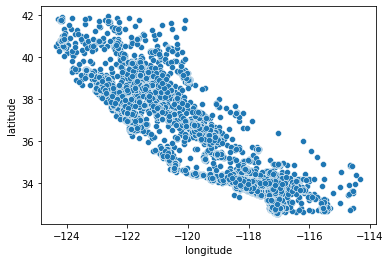

In [21]:
sns.scatterplot(x="longitude",y="latitude", data=exp_data,
                )
plt.show()

In [22]:
# Calculationg the correlation matrix
corr_matrix= exp_data.corr()    #by defualt it caluclates the pearson's cprrelation.
corr_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [23]:
#We are more catious about the median housing value
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [24]:
from pandas.plotting import scatter_matrix

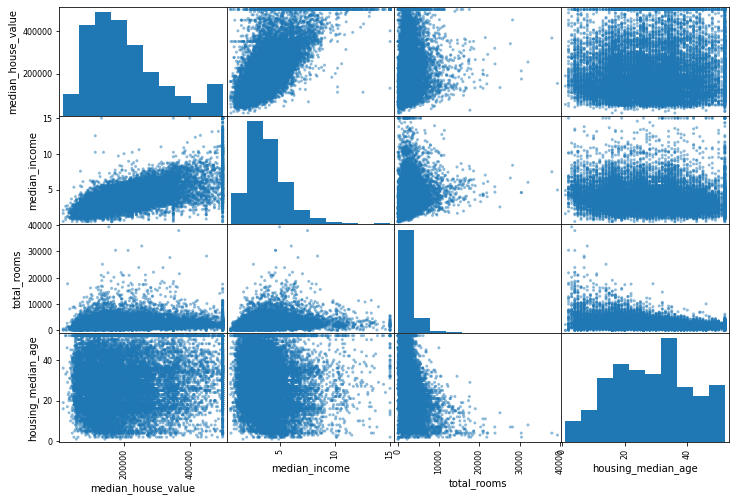

In [25]:
attributes = ["median_house_value", "median_income","total_rooms", "housing_median_age"]
scatter_matrix(exp_data[attributes],figsize=(12,8))
plt.show()

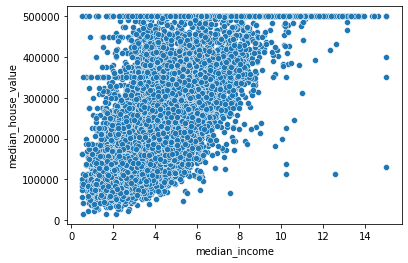

In [26]:
# It clear from the above picture that the correlation are high with
#house_income attribute.
sns.scatterplot(x="median_income", y="median_house_value",
                 data=exp_data)
plt.show()


#### Experimenting with attributes combinations

In [27]:
exp_data["room_per_household"]=exp_data["total_rooms"]/exp_data["households"]
exp_data["bedrooms_per_room"]=exp_data["total_bedrooms"]/exp_data["total_rooms"]
exp_data["room_per_household"]=exp_data["population"]/exp_data["households"]

In [28]:
exp_data.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
room_per_household   -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedrooms_per_room    -0.259952
Name: median_house_value, dtype: float64

#### Cleaning the data